In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Carregando a base de dados CFAR10 e verificando-a
#O treino possui 50000 amostras, de 32x32 pixels e 3 tonalidades de cores (RGB)
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
#O teste já possui 10000 amostras, de 32x32 pixels e 3 tonalidades de cores (RGB)
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
#Verificando as 5 primeiras amostras
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#Remodelando um matriz bidimensional em unidimensional para que o elemento
#não seja um um elemento dentro de duas arrays ([[1],[2]...]), apenas um número simples em 
# um array ([1, 2...])

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["Avião", "Automóvel", "Pássaro", "Gato", "Bebida", "Cachorro", "Sapo", "Cavalo", "Navio", "Caminhão"]

In [ ]:
#Função para imprimir a imagem
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

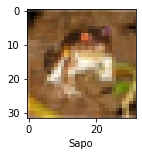

In [ ]:
plot_sample(X_train, y_train, 0)

In [ ]:
#Normalizando os dados de treinamento
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#Rede neural artificial para classificação de imagem
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.9242 - accuracy: 0.3079
Epoch 2/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.6441 - accuracy: 0.4192
Epoch 3/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5552 - accuracy: 0.4511
Epoch 4/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.4836 - accuracy: 0.4788
Epoch 5/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.4491 - accuracy: 0.4924


In [ ]:
#Relatório de classificação

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.66      0.54      1000
           1       0.64      0.57      0.61      1000
           2       0.36      0.30      0.33      1000
           3       0.42      0.21      0.28      1000
           4       0.40      0.42      0.41      1000
           5       0.47      0.30      0.37      1000
           6       0.34      0.82      0.48      1000
           7       0.67      0.41      0.50      1000
           8       0.71      0.50      0.59      1000
           9       0.58      0.56      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



In [ ]:
#Rede Neural Convolucional
cnn = models.Sequential([
                         
    #Filtros para detectção da imagem                     
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
#Modelo usual de compilação
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.7136 - accuracy: 0.3757
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1707 - accuracy: 0.5862
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0106 - accuracy: 0.6450
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9212 - accuracy: 0.6793
Epoch 5/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.8423 - accuracy: 0.7075
Epoch 6/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.7930 - accuracy: 0.7242
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7304 - accuracy: 0.7441
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.6796 - accuracy: 0.7614
Epoch 9/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.6425 - accuracy: 0.7750
Epoch 10/10
1563/1563 [==============================] - 51s 33m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9300 - accuracy: 0.6926


[0.9299817085266113, 0.6926000118255615]

In [ ]:
#Analisar todas as amostras X e obter o Y previsto
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.4008881e-03, 3.7625312e-05, 1.1609220e-03, 6.8883282e-01,
        2.6839692e-04, 2.9360753e-01, 1.4268993e-02, 2.9203031e-05,
        3.6066896e-04, 3.2920449e-05],
       [1.4208794e-03, 5.3468138e-01, 8.8122815e-06, 1.9454853e-07,
        3.5318863e-08, 6.6293193e-10, 1.3545348e-08, 4.0419199e-08,
        4.5165122e-01, 1.2237374e-02],
       [9.2047416e-02, 6.0116056e-02, 4.2555510e-04, 7.6847419e-04,
        2.0774930e-04, 2.2189667e-04, 1.5248189e-04, 7.5171702e-04,
        8.3219516e-01, 1.3113430e-02],
       [9.8173761e-01, 2.4162673e-03, 4.0617720e-03, 2.0169734e-03,
        5.9573534e-03, 8.8614597e-06, 4.2674310e-06, 8.3146855e-04,
        2.9509312e-03, 1.4427063e-05],
       [5.5876757e-07, 2.9235796e-05, 1.5146385e-01, 1.9385542e-01,
        4.6789303e-01, 5.9558667e-02, 1.2677565e-01, 1.4006668e-04,
        1.1438023e-05, 2.7198353e-04]], dtype=float32)

In [ ]:
#Os elementos acima são distribuição de probabilidade, entre 0 e 1, utilizando o softmax
#e é necessário descobrir qual elemento é o maior mas ele poderá cometar erros
#dependendo da sua precisão
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [ ]:
#Valor real, levando em conta a classes de elementos
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes[y_classes[3]]

'Avião'

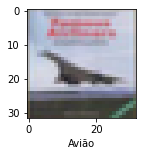

In [ ]:
#Resultado:
plot_sample(X_test, y_test,3)